47923 23604
Lag: 56
Coefficients: [ 6.70617286e-03  1.50464171e+00 -5.70687742e-01  2.46093415e-01
 -2.13207184e-01  2.84518528e-02  1.00889385e-01 -3.76643815e-02
 -8.94644239e-02  1.08316513e-01 -5.69693949e-02 -1.48393970e-02
  9.01339644e-03  1.34147407e-02 -4.99497448e-02  1.81487207e-02
  4.28330298e-02 -5.01572833e-02 -3.42337487e-03  6.82828772e-02
 -7.70127195e-02  4.12184527e-02  3.38630599e-03 -3.12484857e-02
  1.33191731e-02  3.80350597e-02 -9.17565561e-02  7.91591639e-02
 -2.10799147e-02 -3.66601032e-03 -2.17892677e-02  3.52904646e-02
 -2.82909583e-02  8.58655230e-03  1.25156773e-02 -2.12100895e-04
 -1.71055053e-02  2.27866222e-02 -6.64574796e-03 -2.54311868e-02
  1.62600619e-02  6.64756297e-03 -3.18879758e-02  2.56944780e-02
  8.89115128e-03 -1.04451794e-03 -9.89979330e-03  8.25988626e-03
  1.65499977e-02 -2.43621357e-02  8.80181143e-03 -9.35982468e-04
 -1.47972125e-02  1.78532883e-02 -1.86630376e-02 -5.46838346e-04
  9.39751203e-03]
train ratio  0.670000
Test MSE: 6193.9

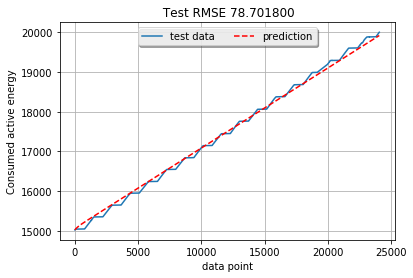

In [26]:
from pandas import Series, read_csv, datetime
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import numpy as np

import sys
import os

csv_file = 'CRAC3.out.csv'
series = Series.from_csv(csv_file, header=0)

ratio = 0.67

print train_size, test_size
# split dataset
X = series.values
train_size = int(len(X) * ratio)
test_size = len(X) - train_size


train, test = X[0:train_size], X[train_size:len(X)]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
print('train ratio  %f' % ratio)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
error_rt = sqrt(error)

print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
# plot predictions vs expected
pyplot.grid("on")
pyplot.xlabel("data point")
pyplot.ylabel("Consumed active energy")
pyplot.title(" Test RMSE %f"%(error_rt))
pyplot.plot(test,label="test data")
pyplot.plot(predictions, color='red',linestyle='--',label="prediction")
pyplot.legend(loc='upper center',  shadow=True, ncol=2)

pyplot.show()

pyplot.savefig('predict2.png')




